In [ ]:
import pandas as pd
import networkx as nx
from datetime import datetime, timedelta

## Utils

In [134]:
def getTrainMaxSpeed(train_id):
    train_id = str(train_id)
    if train_id[0].isdigit():
        return "80"
    elif train_id[0].isalpha():
        if train_id[0] == "G" or train_id[0] == "C":
            return "350"
        elif train_id[0] == "D":
            return "260"
        elif train_id[0] == "Z" or train_id[0] == "T":
            return "160"
        else:
            return "120"

In [190]:
def convertTimetoMinute(time, day):
    if day == "Day 1":
        time_str = time.strftime('%H:%M:%S')
        time_obj = datetime.strptime(time_str, '%H:%M:%S')
        minutes = time_obj.time().hour * 60 + time_obj.time().minute
        return minutes
    elif day == "Day 2":
        time_str = time.strftime('%H:%M:%S')
        time_obj = datetime.strptime(time_str, '%H:%M:%S')
        minutes = time_obj.time().hour * 60 + time_obj.time().minute + 24 * 60
        return minutes
    elif day == "Day 3":
        time_str = time.strftime('%H:%M:%S')
        time_obj = datetime.strptime(time_str, '%H:%M:%S')
        minutes = time_obj.time().hour * 60 + time_obj.time().minute + 24 * 60 * 2
        return minutes

# Network Construction

## Mutli Directed Network

In [101]:
df = pd.read_excel('../data/Railway Data_JL.xlsx')
df

train  st_no  st_id   date  arr_time  dep_time stay_time mileage  \
0      1095      1    692  Day 1  19:06:00  19:06:00         -       0   
1      1095      2   1351  Day 1  19:27:00  19:32:00         5      27   
2      1095      3    698  Day 1  19:59:00  20:01:00         2      63   
3      1095      4    944  Day 1  20:31:00  20:35:00         4     108   
4      1095      5    232  Day 1  21:00:00  21:04:00         4     139   
...     ...    ...    ...    ...       ...       ...       ...     ...   
69633   Z97      1    390  Day 1  13:00:00  13:00:00         -       0   
69634   Z97      2   2175  Day 1  18:41:00  18:47:00         6     707   
69635   Z97      3   1374  Day 1  23:16:00  23:22:00         6    1243   
69636   Z97      4   2265  Day 2  02:35:00  02:41:00         6    1605   
69637   Z97      5    952  Day 2  10:01:00  10:01:00         -    2320   

             lat         lon  
0      37.860480  112.586820  
1      37.697190  112.731180  
2      37.421360  112.570320  
3      37.206610  112.168470  
4      37.018470  111.919060  
...          ...         ...  
69633  39.896042  116.321152  
69634  34.746610  113.659410  
69635  30.528640  114.317010  
69636  28.200063  113.019529  
69637  23.149242  113.324364  

[69638 rows x 10 columns]

### With outliers time datas (ex: 0.8884 and not 0:53:18)

In [220]:
G = nx.MultiDiGraph()
G

In [221]:
st_no_comp = 0
prev_node = 0
prev_mileage = 0
prev_dep_time = 0
for index, row in df.iterrows():
    if not G.has_node(row["st_id"]):
        G.add_node(row["st_id"], lat=row["lat"], lon=row["lon"])
    if row["st_no"] == st_no_comp:
        G.add_edge(prev_node, row["st_id"], arr_time=row["dep_time"], dep_time=prev_dep_time, train=row["train"], train_max_speed=getTrainMaxSpeed(row["train"]), day=row["date"])
        st_no_comp = row["st_no"] + 1
        prev_node = row["st_id"]
        prev_mileage = row["mileage"]
        prev_dep_time = row["dep_time"]
    else:
        prev_dep_time = row["dep_time"]
        st_no_comp = row["st_no"] + 1
        prev_node = row["st_id"]
        prev_mileage = row["mileage"]

In [222]:
G.number_of_nodes()

2719

In [223]:
G.number_of_edges()

64155

In [224]:
for node in list(G.nodes):
    print(node, G.out_edges(node))

692 [(692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 691), (692, 691), (692, 691), (692, 691), (692, 691), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1110), (692, 1110), (692, 1110), (692, 2289), (692, 2289), (692, 2289), (692, 2289), (692, 

In [225]:
for edge in list(G.edges):
    print(edge,G[edge[0]][edge[1]][edge[2]]["day"], G[edge[0]][edge[1]][edge[2]]["dep_time"], G[edge[0]][edge[1]][edge[2]]["arr_time"], G[edge[0]][edge[1]][edge[2]]["train"], G[edge[0]][edge[1]][edge[2]]["train_max_speed"])

(692, 1351, 0) Day 1 19:06:00 19:32:00 1095 80
(692, 1351, 1) Day 1 14:53:00 15:18:00 1485 80
(692, 1351, 2) Day 1 19:30:00 19:58:00 1551 80
(692, 1351, 3) Day 1 19:30:00 19:58:00 1554 80
(692, 1351, 4) Day 2 04:42:00 05:07:00 2462 80
(692, 1351, 5) Day 2 04:42:00 05:07:00 2463 80
(692, 1351, 6) Day 1 22:50:00 23:16:00 2671 80
(692, 1351, 7) Day 1 07:17:00 07:41:00 2673 80
(692, 1351, 8) Day 1 14:38:00 15:03:00 6032 80
(692, 1351, 9) Day 1 06:30:00 07:06:00 6034 80
(692, 1351, 10) Day 1 12:42:00 13:07:00 K1885 120
(692, 1351, 11) Day 1 12:42:00 13:07:00 K1888 120
(692, 1351, 12) Day 1 23:30:00 23:56:00 K237 120
(692, 1351, 13) Day 1 23:30:00 23:56:00 K240 120
(692, 1351, 14) Day 2 08:08:00 08:33:00 K609 120
(692, 1351, 15) Day 1 08:47:00 09:12:00 K689 120
(692, 1351, 16) Day 2 07:50:00 08:15:00 K865 120
(692, 1351, 17) Day 2 07:50:00 08:15:00 K868 120
(692, 1351, 18) Day 1 11:48:00 12:13:00 K902 120
(692, 1351, 19) Day 1 11:48:00 12:13:00 K903 120
(692, 689, 0) Day 1 23:08:00 23:16:00 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Without outliers time datas (ex: 0.8884 and not 0:53:18)

In [204]:
G = nx.MultiDiGraph()
G

In [205]:
st_no_comp = 0
prev_node = 0
prev_mileage = 0
prev_dep_time = 0
count_exception = 0
for index, row in df.iterrows():
    if not G.has_node(row["st_id"]):
        G.add_node(row["st_id"], lat=row["lat"], lon=row["lon"])
    if row["st_no"] == st_no_comp:
        try:
            row["dep_time"].strftime('%H:%M:%S')
            G.add_edge(prev_node, row["st_id"], arr_time=convertTimetoMinute(row["dep_time"], row["date"]), dep_time=prev_dep_time, train=row["train"], train_max_speed=getTrainMaxSpeed(row["train"]), day=row["date"])
        except:
            count_exception += 1
        # G.add_edge(prev_node, row["st_id"], arr_time=row["dep_time"], dep_time=prev_dep_time, train=row["train"], train_max_speed=getTrainMaxSpeed(row["train"]), day=row["date"])
        st_no_comp = row["st_no"] + 1
        prev_node = row["st_id"]
        prev_mileage = row["mileage"]
        # prev_dep_time = row["dep_time"]
        try:
            prev_dep_time = convertTimetoMinute(row["dep_time"], row["date"])
        except:
            pass
    else:
        try:
            prev_dep_time = convertTimetoMinute(row["dep_time"], row["date"])
        except:
            pass
        # prev_dep_time = row["dep_time"]
        st_no_comp = row["st_no"] + 1
        prev_node = row["st_id"]
        prev_mileage = row["mileage"]

print(count_exception)

6567


In [206]:
G.number_of_nodes()

2719

In [207]:
G.number_of_edges()

57588

In [208]:
for node in list(G.nodes):
    print(node, G.out_edges(node))

692 [(692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 691), (692, 691), (692, 691), (692, 691), (692, 691), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1110), (692, 1110), (692, 1110), (692, 2289), (692, 2289), (692, 2289), (692, 2289), (692, 

In [209]:
for edge in list(G.edges):
    print(edge,G[edge[0]][edge[1]][edge[2]]["day"], G[edge[0]][edge[1]][edge[2]]["dep_time"], G[edge[0]][edge[1]][edge[2]]["arr_time"], G[edge[0]][edge[1]][edge[2]]["train"], G[edge[0]][edge[1]][edge[2]]["train_max_speed"])

(692, 1351, 0) Day 1 1146 1172 1095 80
(692, 1351, 1) Day 1 893 918 1485 80
(692, 1351, 2) Day 1 1170 1198 1551 80
(692, 1351, 3) Day 1 1170 1198 1554 80
(692, 1351, 4) Day 2 1722 1747 2462 80
(692, 1351, 5) Day 2 1722 1747 2463 80
(692, 1351, 6) Day 1 1370 1396 2671 80
(692, 1351, 7) Day 1 437 461 2673 80
(692, 1351, 8) Day 1 878 903 6032 80
(692, 1351, 9) Day 1 390 426 6034 80
(692, 1351, 10) Day 1 762 787 K1885 120
(692, 1351, 11) Day 1 762 787 K1888 120
(692, 1351, 12) Day 1 1410 1436 K237 120
(692, 1351, 13) Day 1 1410 1436 K240 120
(692, 1351, 14) Day 2 1928 1953 K609 120
(692, 1351, 15) Day 1 527 552 K689 120
(692, 1351, 16) Day 2 1910 1935 K865 120
(692, 1351, 17) Day 2 1910 1935 K868 120
(692, 1351, 18) Day 1 708 733 K902 120
(692, 1351, 19) Day 1 708 733 K903 120
(692, 689, 0) Day 1 1388 1396 2461 80
(692, 689, 1) Day 1 1388 1396 2464 80
(692, 689, 2) Day 2 2008 2016 2672 80
(692, 689, 3) Day 1 509 518 4616 80
(692, 689, 4) Day 1 1010 1017 4636 80
(692, 689, 5) Day 1 390 397 

## Simplified Single Directed network

In [226]:
SG = G

for edge in list(SG.edges):
    if edge[2] != 0:
        SG.remove_edge(edge[0], edge[1], key=edge[2])

In [227]:
SG.number_of_nodes()

2719

In [228]:
SG.number_of_edges()

10789

## Undirected network only spatial

In [229]:
SG = SG.to_undirected(reciprocal=False)

In [230]:
SG.number_of_nodes()

2719

In [231]:
SG.number_of_edges()

6173

In [232]:
for edge in list(SG.edges):
    print(edge)

(692, 1351, 0)
(692, 689, 0)
(692, 691, 0)
(692, 226, 0)
(692, 1771, 0)
(692, 1110, 0)
(692, 2289, 0)
(692, 518, 0)
(692, 1049, 0)
(692, 944, 0)
(692, 109, 0)
(692, 2288, 0)
(1351, 698, 0)
(1351, 1352, 0)
(1351, 1805, 0)
(1351, 691, 0)
(1351, 828, 0)
(1351, 232, 0)
(1351, 944, 0)
(1351, 2267, 0)
(1351, 1944, 0)
(698, 944, 0)
(698, 1805, 0)
(944, 232, 0)
(944, 1805, 0)
(944, 1003, 0)
(232, 1639, 0)
(232, 127, 0)
(232, 1003, 0)
(232, 736, 0)
(232, 2335, 0)
(232, 1512, 0)
(1639, 2335, 0)
(2335, 1512, 0)
(2335, 127, 0)
(2335, 2112, 0)
(1512, 127, 0)
(1512, 2112, 0)
(127, 259, 0)
(127, 2045, 0)
(259, 1835, 0)
(259, 2137, 0)
(259, 105, 0)
(259, 1148, 0)
(259, 2045, 0)
(259, 2274, 0)
(1835, 1480, 0)
(1835, 1148, 0)
(1480, 2362, 0)
(2362, 503, 0)
(503, 1009, 0)
(503, 2361, 0)
(503, 2058, 0)
(1009, 2058, 0)
(1009, 2361, 0)
(1009, 2278, 0)
(1009, 2017, 0)
(1009, 2016, 0)
(1009, 2213, 0)
(2058, 802, 0)
(2058, 1580, 0)
(2058, 413, 0)
(2058, 542, 0)
(2058, 1787, 0)
(2058, 2237, 0)
(2058, 2057, 0)
(

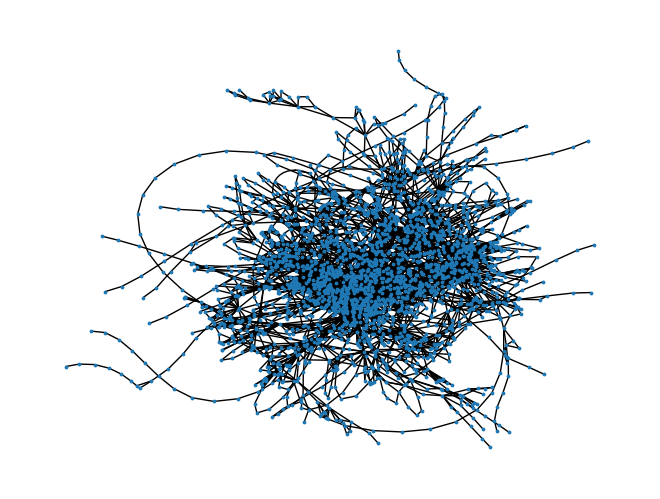

In [233]:
nx.draw(SG,node_size=3)

In [ ]:
from libpysal import weights
import matplotlib.pyplot as plt
import networkx as nx
import geopandas
import numpy as np

# read in example data from geojson. GeoJSON is a file format
# for encoding geographic data based on JSON. It is useful for
# presenting geographic data on the web, and is increasingly
# used as a file format for geographic data.
filepath = "nuts1.geojson"
european_regions = geopandas.read_file(filepath)

# extract the centroids for connecting the regions, which is
# the average of the coordinates that define the polygon's boundary
centroids = np.column_stack((european_regions.centroid.x, european_regions.centroid.y))

# construct the "Queen" adjacency graph. In geographical applications,
# the "Queen" adjacency graph considers two polygons as connected if
# they share a single point on their boundary. This is an analogue to
# the "Moore" neighborhood nine surrounding cells in a regular grid.
queen = weights.Queen.from_dataframe(european_regions)

# Then, we can convert the graph to networkx object using the
# .to_networkx() method.
graph = queen.to_networkx()

# To plot with networkx, we need to merge the nodes back to
# their positions in order to plot in networkx
positions = dict(zip(graph.nodes, centroids))

# plot with a nice basemap
ax = european_regions.plot(linewidth=1, edgecolor="grey", facecolor="lightblue")
ax.axis([-12, 45, 33, 66])
ax.axis("off")
nx.draw(graph, positions, ax=ax, node_size=5, node_color="r")
plt.show()

# An alternative method to construct graphs from polygons may use
# pygeos. This package is a high-performance interface to the GEOS C
# library, used in computing geographical relationships. These let us
# describe the relationships between "point sets," like polygons whether
# or not a line "crosses" a polygon, or whether two polygons "touch."
# These relationships, called "predicates", are extensive, and are documented
# by the pygeos package.